In [1]:
#important libraries
#importing the necessary packages
import pandas as pd
import string
#import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_selection import RFE
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator


warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
patient_records=pd.read_csv('kaggle/Dataset.csv/Dataset.csv')
patient_records.head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [3]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
corr_matrix = patient_records.corr()

# Get the top 10 columns with the highest absolute correlation coefficients with 'hospital_death'
related_cols = corr_matrix['hospital_death'].abs().sort_values(ascending=False)[1:11]

print(related_cols)

d1_lactate_min                   0.403614
d1_lactate_max                   0.399029
h1_lactate_min                   0.344046
h1_lactate_max                   0.340951
apache_4a_hospital_death_prob    0.311043
apache_4a_icu_death_prob         0.283913
gcs_motor_apache                 0.282449
gcs_eyes_apache                  0.260373
gcs_verbal_apache                0.241044
d1_sysbp_invasive_min            0.234382
Name: hospital_death, dtype: float64


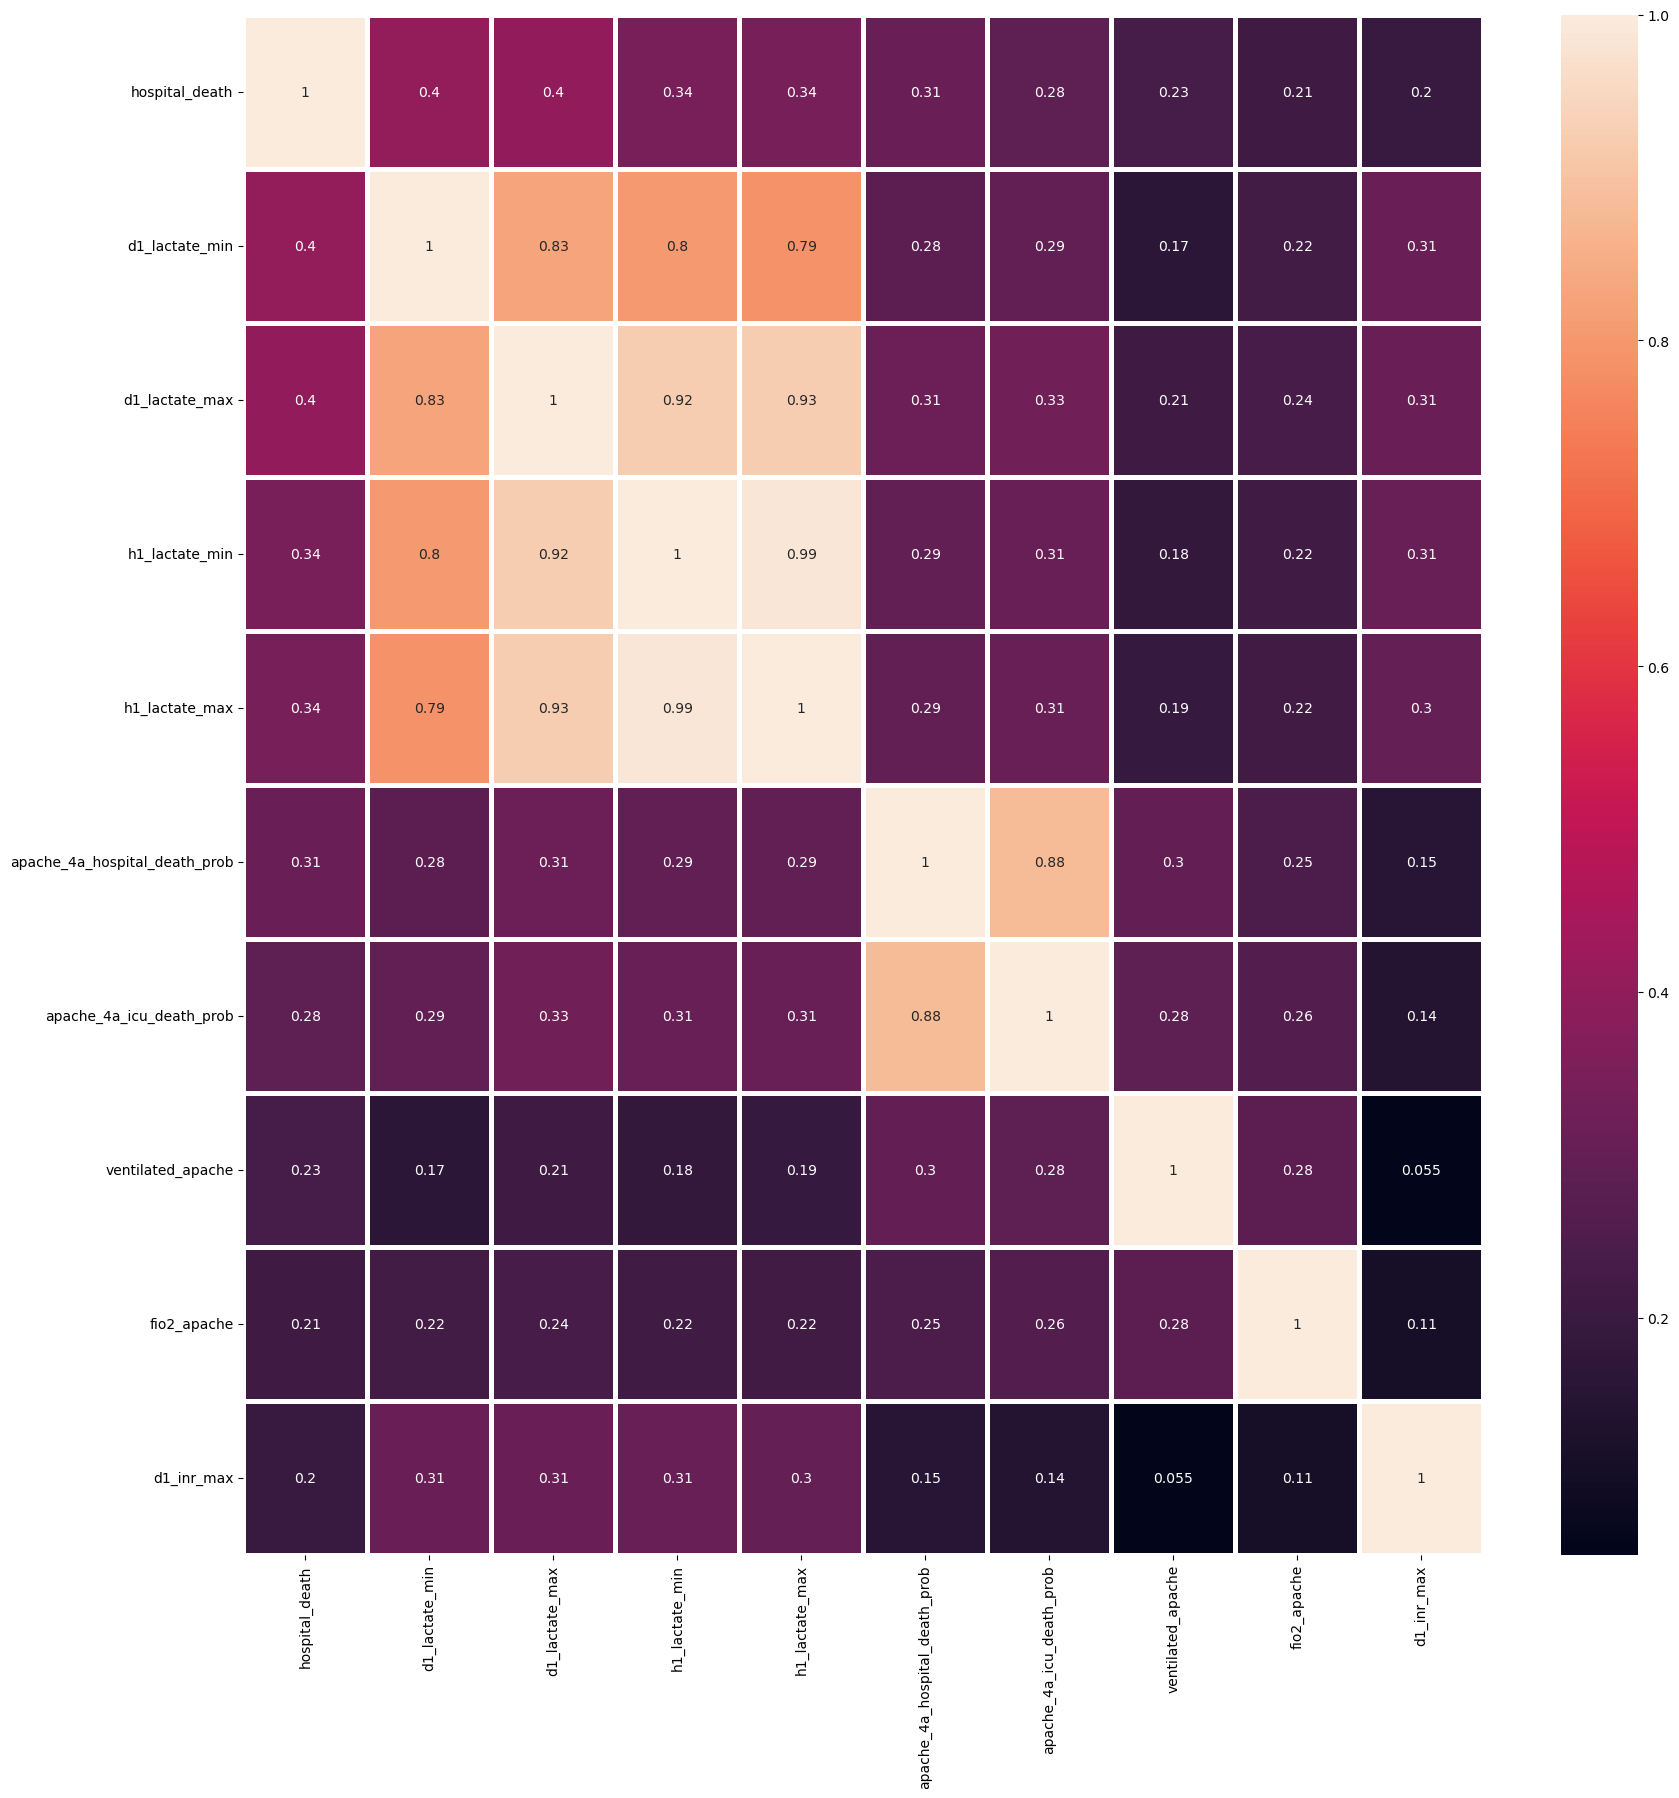

In [4]:
related_cols_10 = corr_matrix.nlargest(10, 'hospital_death')['hospital_death'].index


corr_subset = patient_records[related_cols_10].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_subset,annot=True,linewidth=3.5)
plt.show()

In [5]:
import pandas as pd
import statsmodels.formula.api as smf

# Define the logistic regression model
model = smf.logit("hospital_death ~ d1_lactate_min + d1_lactate_max + h1_lactate_min + h1_lactate_max + apache_4a_hospital_death_prob + apache_4a_icu_death_prob + gcs_motor_apache + gcs_eyes_apache + gcs_verbal_apache + d1_sysbp_invasive_min", data=patient_records)

# Fit the model to the data
results = model.fit()

# Print a summary of the model results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.408148
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         hospital_death   No. Observations:                 2512
Model:                          Logit   Df Residuals:                     2501
Method:                           MLE   Df Model:                           10
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2877
Time:                        23:37:03   Log-Likelihood:                -1025.3
converged:                       True   LL-Null:                       -1439.4
Covariance Type:            nonrobust   LLR p-value:                1.738e-171
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.2616      0.301     -7.518      0.

It uses multiple linear regression to analyze the relationship between hospital_death and 10 feature variables from patient_records. The output displays the coefficients and p-values for each feature variable, as well as the statistical information for the whole model.

The results show that d1_lactate_min, d1_lactate_max, apache_4a_hospital_death_prob and apache_4a_icu_death_prob have the highest coefficients, indicating that they are more strongly related to hospital_death than the other variables. The p-values for these variables are all less than 0.05, indicating that the relationships are statistically significant.

On the other hand, h1_lactate_min, h1_lactate_max, gcs_motor_apache, gcs_verbal_apache, and d1_sysbp_invasive_min have lower coefficients and p-values greater than 0.05, indicating that they may not be significant predictors of hospital_death.

It is worth noting that the results of the multiple linear regression analysis depend on the assumptions of the model, and may not accurately reflect the true relationships between the variables. Therefore, the results should be interpreted with caution and further analysis may be necessary to confirm the findings.

In [6]:
import pandas as pd
import xgboost as xgb

X = patient_records[['d1_lactate_min', 'd1_lactate_max', 'h1_lactate_min', 'h1_lactate_max', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'd1_sysbp_invasive_min']]
y = patient_records['hospital_death']

model = xgb.XGBRegressor()


model.fit(X, y)


print(model.feature_importances_)

[0.09458432 0.06003931 0.0383941  0.04242479 0.19327447 0.32369885
 0.06167217 0.05763064 0.07480075 0.05348063]


1. In this model, the most important feature variable is 'apache_4a_icu_death_prob' with an importance score of 0.32. This suggests that this variable is one of the most accurate predictors of hospital mortality.
2. Apart from 'apache_4a_icu_death_prob', the other two feature variables with high importance scores are 'apache_4a_hospital_death_prob' and 'd1_lactate_min', with importance scores of 0.19 and 0.09, respectively. This indicates that these variables are also strongly correlated with hospital mortality.
3. Other feature variables have much lower importance scores, indicating that they have a smaller contribution to predicting hospital mortality. These variables include 'd1_lactate_max', 'h1_lactate_min', 'h1_lactate_max', 'gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'd1_sysbp_invasive_min' and 'hospital_admit_source'.

In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read in the CSV file

# Define X and y variables
X = patient_records[['d1_lactate_min', 'd1_lactate_max', 'h1_lactate_min', 'h1_lactate_max', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'd1_sysbp_invasive_min']]
y = patient_records['hospital_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'n_estimators'      : 5000  ,
    'subsample'         : 0.8   ,
    'colsample_bytree'  : 0.4   ,
    'random_state'      : 2020  ,
    'seed'              : 2020  ,  
}

# Define the XGBClassifier model
model = xgb.XGBClassifier(**params)

# Fit the model to the training data
model.fit(X_train, y_train, 
          eval_metric=["error", 'auc'], 
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=20, 
          early_stopping_rounds=100)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

[0]	validation_0-error:0.07960	validation_0-auc:0.76894	validation_1-error:0.07992	validation_1-auc:0.76923
[20]	validation_0-error:0.07038	validation_0-auc:0.87481	validation_1-error:0.07442	validation_1-auc:0.86458
[40]	validation_0-error:0.06794	validation_0-auc:0.88081	validation_1-error:0.07523	validation_1-auc:0.86514
[60]	validation_0-error:0.06553	validation_0-auc:0.88485	validation_1-error:0.07583	validation_1-auc:0.86427
[80]	validation_0-error:0.06320	validation_0-auc:0.88900	validation_1-error:0.07621	validation_1-auc:0.86361
[100]	validation_0-error:0.06132	validation_0-auc:0.89337	validation_1-error:0.07561	validation_1-auc:0.86210
[120]	validation_0-error:0.05983	validation_0-auc:0.89658	validation_1-error:0.07681	validation_1-auc:0.86076
[137]	validation_0-error:0.05883	validation_0-auc:0.89910	validation_1-error:0.07687	validation_1-auc:0.85950
Accuracy: 0.9251485580330371


The XGBoost classifier model achieved an accuracy score of 0.925, suggesting that the model is effective at predicting hospital mortality based on these feature variables.